In [93]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display, Image    
import time
import pickle as pkl
from tabulate import tabulate

In [94]:
# Initializing environment
env = gym.make('FrozenLake-v1',is_slippery=False, render_mode='rgb_array')
grid_height, grid_width = env.unwrapped.desc.shape  

In [95]:
# Printing the grid layout of the environment, where S is the starting point, G is the goal, F is the frozen surface, and H is the hole
print('Grid layout:\n', env.unwrapped.desc) 

Grid layout:
 [[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]


In [96]:
print('Action space: ', env.action_space)
print('Observation space: ', env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


**Here I have 16 states and 4 actions.**

In [97]:
# Transition probabilities
# I want to know the probability of transitioning from state 0 to state 1 when taking action 0
# The transition probabilities are stored in env.P[state][action]
# State 0 is the starting state, action 1 is moving down
env.unwrapped.P[0][1]
# I wanna know what happens if I start at position 0 and move down(action 1)

[(1.0, 4, 0.0, False)]

**With 100% probability, I can moved to state 4, I did not get any reward. False means the game is not over.**

In [98]:
# Creating Q-table to store action-state values
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [99]:
print('Q_table Before Training')
print(Q)

Q_table Before Training
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Q-Learning

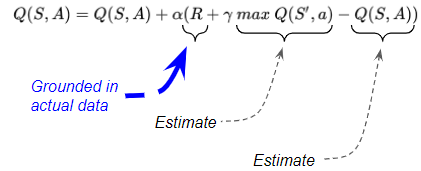

In [100]:
Image(filename='datasets/Q-learning.png')

<p>Q-Learning let's an agent learn the best action through experience, using a Q-table to guide it forward the highest reward.<p>

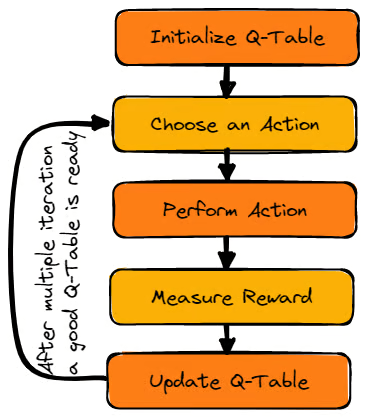

<p>After initializing the Q-table, at the beginning, the agent selects actions randomly to explore the environment; therefore, epsilon is high.</p>
<p>Over time, the agent uses the Q-table to choose actions that provide higher rewards, and epsilon gets lower.</p>

**I got the above image from this pageL: https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial**

In [101]:
# I am gonna use this helper function to calculate the value of the Q-table.
# I got th function from lecture notes

def calculate_value(Q, state, action, reward, next_state, alpha, gamma):
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
    return Q

In [102]:
# I am gonna use to show the Q-table in a nice format
# I got function from lecture notes

def summarize_best_values(q_table, grid_width, grid_height):
    # get a list of highest values for each cell
    best_values = np.max(q_table, axis=1)

    # reshape into matrix that is the same shape as the environment
    return best_values.reshape(grid_width, grid_height)

In [ ]:
# Parameters:
total_episodes = 5000
max_steps = 60
learning_rate = 0.5
gamma = 0.9
epsilon = 0.9
max_epsilon = 0.9
min_epsilon = 0.01
decay_rate = 0.0005

In [104]:
# I am gonna define the threshold for the reward, if agent gains complete reward for 20 times repeatedly, then the loop will break
threshold = 10
#threshold_counter is gonna keep track of how many times the agent has gained the complete reward
threshold_counter = 0 

In [105]:
#  I want to know the number of times the agent has failed to gain the complete reward
fail_counter = 0

### Training Loop

In [ ]:
for episode in range(total_episodes):
    state, __  = env.reset()
    done =  False
    total_rewards = 0
    
    
    for step in range(max_steps):
        # Choose an action: exploitation vs. exploration
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(Q[state, :])
        else:
            action = env.action_space.sample()   
            
        # Take the action           
        observation, reward, done, truncated, __ = env.step(action)
        # Update Q-table
        Q = calculate_value(Q, state, action, reward, observation, learning_rate, gamma)
        state = observation
        total_rewards += reward 


        if done: 
          print(f'Episode {episode}: Steps taken: {step}')
          break 
      
    if total_rewards != 1:
        fail_counter += 1 
        
    if total_rewards == 1:
        threshold_counter += total_rewards
        if threshold_counter == threshold:
            print(f'Threshold reached at episode: {episode}')
            # Save the Q-table
            pkl.dump(Q, open('datasets/Q_table.pkl', 'wb'))
            break
    else:
        threshold_counter = 0
    

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    print(f'Episode {episode} done with total rewards: {total_rewards}, epsilon: {epsilon:.3f}')
    
print(f'Total number of failing episodes: {fail_counter} out of {episode} episodes') 
# I got the main structure of the code from the lecture notes   

Episode 0: Steps taken: 27
Episode 0 done with total rewards: 0.0, epsilon: 0.900
Episode 1: Steps taken: 11
Episode 1 done with total rewards: 0.0, epsilon: 0.900
Episode 2: Steps taken: 12
Episode 2 done with total rewards: 0.0, epsilon: 0.899
Episode 3: Steps taken: 6
Episode 3 done with total rewards: 0.0, epsilon: 0.899
Episode 4: Steps taken: 10
Episode 4 done with total rewards: 0.0, epsilon: 0.898
Episode 5: Steps taken: 7
Episode 5 done with total rewards: 0.0, epsilon: 0.898
Episode 6: Steps taken: 6
Episode 6 done with total rewards: 0.0, epsilon: 0.897
Episode 7: Steps taken: 8
Episode 7 done with total rewards: 0.0, epsilon: 0.897
Episode 8: Steps taken: 7
Episode 8 done with total rewards: 0.0, epsilon: 0.896
Episode 9: Steps taken: 8
Episode 9 done with total rewards: 1.0, epsilon: 0.896
Episode 10: Steps taken: 13
Episode 10 done with total rewards: 0.0, epsilon: 0.896
Episode 11: Steps taken: 9
Episode 11 done with total rewards: 0.0, epsilon: 0.895
Episode 12: Steps t

Episode 22: Steps taken: 38
Episode 22 done with total rewards: 0.0, epsilon: 0.890
Episode 23: Steps taken: 15
Episode 23 done with total rewards: 0.0, epsilon: 0.890
Episode 24: Steps taken: 2
Episode 24 done with total rewards: 0.0, epsilon: 0.889
Episode 25: Steps taken: 6
Episode 25 done with total rewards: 0.0, epsilon: 0.889
Episode 26: Steps taken: 8
Episode 26 done with total rewards: 0.0, epsilon: 0.889
Episode 27: Steps taken: 5
Episode 27 done with total rewards: 0.0, epsilon: 0.888
Episode 28: Steps taken: 1
Episode 28 done with total rewards: 0.0, epsilon: 0.888
Episode 29: Steps taken: 14
Episode 29 done with total rewards: 0.0, epsilon: 0.887
Episode 30: Steps taken: 6
Episode 30 done with total rewards: 0.0, epsilon: 0.887
Episode 31: Steps taken: 1
Episode 31 done with total rewards: 0.0, epsilon: 0.886
Episode 32: Steps taken: 10
Episode 32 done with total rewards: 0.0, epsilon: 0.886
Episode 33: Steps taken: 4
Episode 33 done with total rewards: 0.0, epsilon: 0.885


**The threshold helps me to break the loop earlier**

Above block code is loop training that agent learns in 10000 episodes, inside of the main loop is another loop to prevents the agent from getting stuck in infinite loops.

Inside the sub loop is a condition that if the random value is higher than epsilon, the agent uses Q-table as map for navigation, but if the random value is smaller than epsilon, the agent takes action randomly.

After each action, Q-table and rewards are updated.

At the end, outside of the sub loop there is Exponential Decay Formula:  
ϵ = min_epsilon + (max_epsilon − min_epsilon) ⋅ e^(−decay_rate ⋅ episode).

After each iteration, epsilon's value decreases so the chance that the agent takes action randomly is getting low.

For example: I am going to try the first iteration:  
- min value is 0.01  
- max value is 0.9  
- episode is: the first one, which means 1  
- decay_rate is 0.0005  
- e = 2.71828  


Since the value of x is negative, I am going to use this way:  
`1/(0.9.e^(0.0005)), 1/(0.0005), 0.9995`


So the decay rate is extracted from epsilon, so in the first few episodes the chance of exploration is around 90%.

I think after 13,600 episodes, epsilon would reach the min_epsilon's value, this is the equation:  
`−0.0005⋅episode = ln(0.0011236) = −6.8`


It means after that the chance of exploration is around 1%.

**I used LLM to give a readable layout to above text**

In [107]:
# Applying the summarize best value function
best_values = summarize_best_values(Q, grid_width, grid_height)
print('Q_table after Training:')
print(tabulate(best_values, tablefmt='fancy_grid', floatfmt=".2f"))
# I got the tabulate table from below link:
# https://pypi.org/project/tabulate/

Q_table after Training:
╒══════╤══════╤══════╤══════╕
│ 0.59 │ 0.66 │ 0.73 │ 0.66 │
├──────┼──────┼──────┼──────┤
│ 0.66 │ 0.00 │ 0.81 │ 0.00 │
├──────┼──────┼──────┼──────┤
│ 0.73 │ 0.81 │ 0.90 │ 0.00 │
├──────┼──────┼──────┼──────┤
│ 0.00 │ 0.90 │ 1.00 │ 0.00 │
╘══════╧══════╧══════╧══════╛


<p> According to the Q-table, there is two short path to get the tressure, and the both path's scores are same, 0.66, 0.77, 81, 0.90, 1<p>

### Loading the new environment 

In [116]:
environment =  gym.make('FrozenLake-v1',is_slippery=False, render_mode='rgb_array') 

In [117]:
# let's inspect the environment
print("Observation space:")
print(environment.observation_space)

print("\nAction space:")
print(environment.action_space)

Observation space:
Discrete(16)

Action space:
Discrete(4)


In [118]:
# load the Q-table
Q_table = pkl.load(open('datasets/Q_table.pkl', 'rb'))

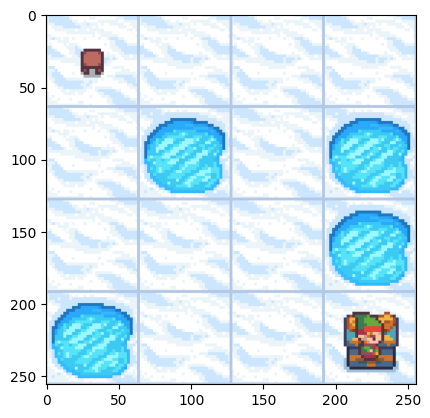

Episode 3: Steps taken: 5, Total Reward: 1.0


In [133]:
environment.reset()
clear_output(wait=True)
plt.imshow(environment.render())
plt.show()


for episode in range(3):
    state,__  = environment.reset()
    done = False
    total_rewards = 0
   
    
    for step in range(max_steps):
        
        action =  np.argmax(Q_table[state, :])
        observation, reward, done, truncated, __ = environment.step(action)
        total_rewards += reward
        
        clear_output(wait=True)
        plt.imshow(environment.render())
        plt.show()
        
        if done:
            print(f'Episode {episode+1}: Steps taken: {step}, Total Reward: {total_rewards}')
            time.sleep(2)
            break
        
        state = observation
        time.sleep(0.3)
# I got the main structure of the code from the lecture notes